In [72]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Data Cleaning

In [3]:
df=pd.concat([train,test])
df.shape

C:\Users\omran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(10876, 5)

Removing urls

In [6]:
import re

In [7]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [8]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

Removing HTML tags

In [9]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [10]:
df['text']=df['text'].apply(lambda x : remove_html(x))

Romoving Emojis

In [11]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [12]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

Removing punctuations

In [15]:
import string

In [16]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [17]:
df['text']=df['text'].apply(lambda x : remove_punct(x))

Spelling Correction

In [20]:
#!pip install pyspellchecker

In [22]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

It will take too long!!!

In [24]:
df['text']=df['text'].apply(lambda x : correct_spellings(x))

In [25]:
df

,id,keyword,location,target,text
0,1,NaN,NaN,1.0,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,1.0,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,1.0,All residents asked to shelter in place are be...
3,6,NaN,NaN,1.0,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,1.0,Just got sent this photo from Ruby Alaska as s...
...,...,...,...,...,...
3258,10861,NaN,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,NaN,Storm in RI worse than last hurricane My citya...
3260,10868,NaN,NaN,NaN,Green Line derailment in Chicago
3261,10874,NaN,NaN,NaN,MEG issues Hazardous Weather Outlook HWO


### Real Disaster

In [49]:
def create_corpus_df(train, target):
    corpus=[]
    
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [50]:
corpus_new1=create_corpus_df(df,1)
len(corpus_new1)

46274

In [51]:
corpus_new1[:10]

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 'earthquake',
 'May',
 'ALLAH']

In [55]:
from wordcloud import WordCloud

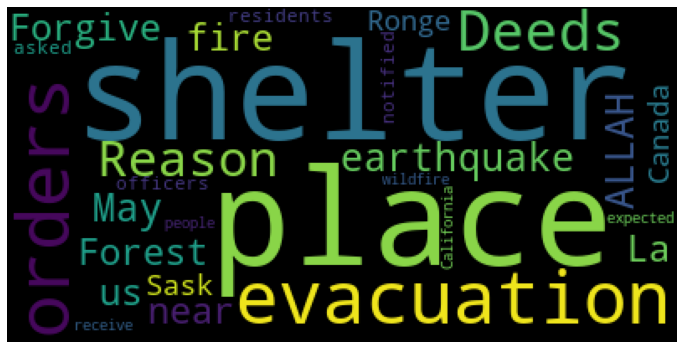

In [56]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new1[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### Not Disaster

In [57]:
corpus_new0=create_corpus_df(df,0)
len(corpus_new0)

60484

In [58]:
corpus_new0[:10]

['Whats', 'up', 'man', 'I', 'love', 'fruits', 'Summer', 'is', 'lovely', 'My']

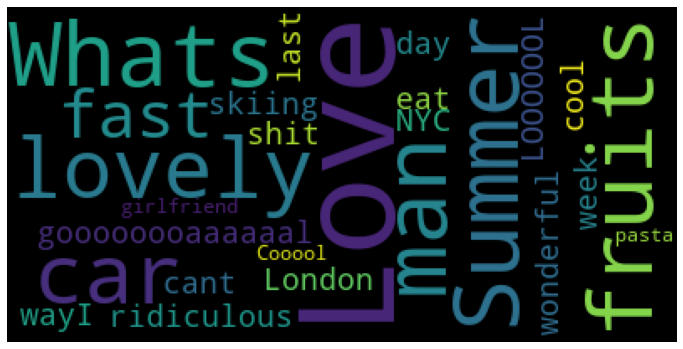

In [59]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new0[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [60]:
df.head(10)

,id,keyword,location,target,text
0,1,NaN,NaN,1.0,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,1.0,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,1.0,All residents asked to shelter in place are be...
3,6,NaN,NaN,1.0,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,1.0,Just got sent this photo from Ruby Alaska as s...
5,8,NaN,NaN,1.0,RockyFire Update California Hwy 20 closed in b...
6,10,NaN,NaN,1.0,flood disaster Heavy rain causes flash floodin...
7,13,NaN,NaN,1.0,Im on top of the hill and I can see a fire in ...
8,14,NaN,NaN,1.0,Theres an emergency evacuation happening now i...
9,15,NaN,NaN,1.0,Im afraid that the tornado is coming to our area


### Bag of Words Counts 

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [68]:
from sklearn.decomposition import PCA, TruncatedSVD


In [66]:
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df["text"].tolist()
list_labels = df["target"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2)
                                                                        

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

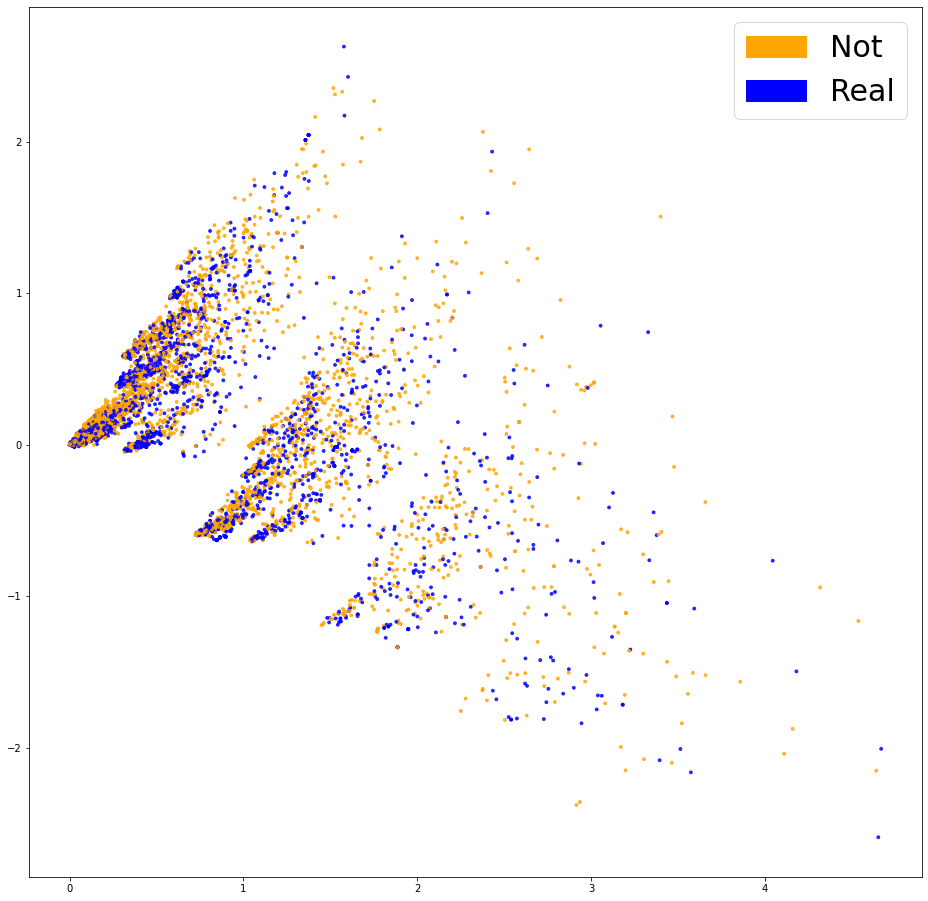

In [73]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Not')
            blue_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

### TF IDF 

In [75]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [76]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

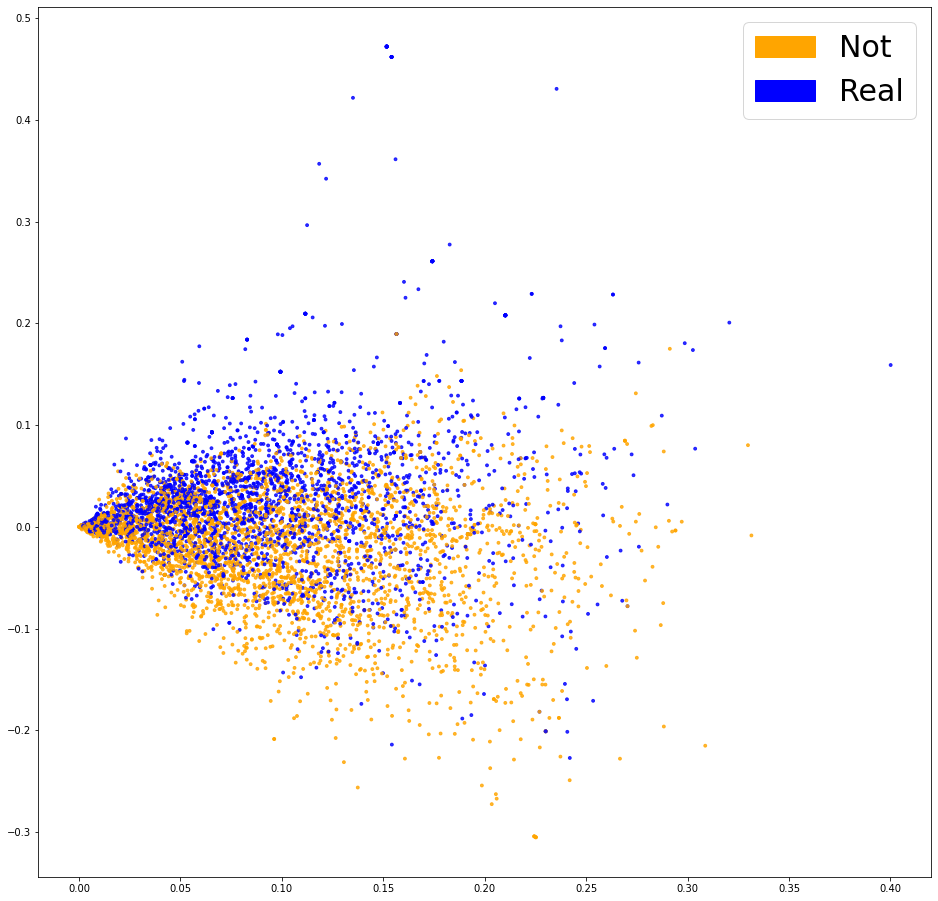

In [77]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()